<a href="https://colab.research.google.com/github/ErikLens/CrScoringMay2023/blob/main/CrScoring_team5_Ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# Загрузка необходимых для анализа библиотек

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [132]:
# Подключение к базе Postgre

!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

--2023-06-05 07:58:43--  https://storage.yandexcloud.net/cloud-certs/CA.pem
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3.5K) [application/x-x509-ca-cert]
Saving to: ‘/root/.postgresql/root.crt’

/root/.postgresql/r 100%[===================>]   3.50K  --.-KB/s    in 0s      

2023-06-05 07:58:44 (565 MB/s) - ‘/root/.postgresql/root.crt’ saved [3579/3579]



In [133]:
# Обновление версии Python вместе с PIP

!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main Sources [2,589 kB]
Get:13 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main amd64 Packages [1,222 kB]
Fetch

In [134]:
# Импорт библиотеки, позволяющей работать с базой Postgre.
# Создание подключения с базой данных credit_scoring.

import psycopg2

conn = psycopg2.connect("""
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
    port=6432
    sslmode=verify-full
    dbname=db_clients
    user=mlhs_student
    password=mlhs_student
    target_session_attrs=read-write
""")

In [135]:
# Сохренение данных из базы в отдельную переменную data и отключения от БД.

query = "SELECT * FROM public.credit_scoring"
data = pd.read_sql_query(query, conn)

conn.close()

Описание атрибутов из анализируемой таблицы:


1.   **SeriousDlqin2yrs** (*int64*): Клиент имел просрочку 90 и более дней
2.   **RevolvingUtilizationOfUnsecuredLines** (*float64*): Общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits/ 
общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости и без долгов в рассрочку, таких как автокредиты, разделенный на сумму кредитных лимитов).
3.   **age** (*float64*): Возраст заемщика.
4.   **NumberOfTime30-59DaysPastDueNotWorse** (*int64*): Сколько раз за последние 2 года наблюдалась просрочка 30-59 дней.
5.   **DebtRatio** (*float64*): Ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход.
6.   **MonthlyIncome** (*float64*): Ежемесячный доход.
7.   **NumberOfOpenCreditLinesAndLoans** (*int64*): Количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт.
8.   **NumberOfTimes90DaysLate** (*int64*): Сколько раз наблюдалась просрочка (90 и более дней).
9.   **NumberOfTime60-89DaysPastDueNotWorse** (*int64*): Сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней.
10.  **NumberOfDependents** (*float64*): Количество иждивенцев на попечении (супруги, дети и др).
11.  **RealEstateLoansOrLines** (*object*): Закодированное количество кредитов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов.
12.  **GroupAge** (*object*): закодированная возрастная группа - чем больше код, тем больше возраст.


In [ ]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
RealEstateLoansOrLines                   object
GroupAge                                 object
dtype: object

In [ ]:
# Первые N строк
data.head(8)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d
5,1,0.392248,50.0,0,1.595253,4676.0,14,0,0,1.0,B,d
6,0,0.034421,69.0,0,0.042383,2500.0,17,0,0,1.0,A,e
7,0,0.392995,58.0,2,0.436103,5500.0,15,0,0,0.0,A,d


In [ ]:
# Размерность таблицы количество строк на количество столбцов
data.shape

(150000, 12)

In [ ]:
# Общая информация по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [136]:
# Сохранение данных в csv файл(промежуточное).
data.to_csv("Credit_scoring_team5.csv", index=False)

In [137]:
data = pd.read_csv("Credit_scoring_team5.csv")

In [138]:
# Проверка того, что подгрузили правильный файл
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


# Первичный анализ

In [ ]:
data.shape

(150000, 12)

In [139]:
# Подсчет количества пустых значений 
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                     14845
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [140]:
# анализ данных по возрасту в разных разрезах
data['age'].isna()
# data.tail(55)
# data['age'].tail(55)
# data['GroupAge']

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Name: age, Length: 150000, dtype: bool

Корректировка поля **age** через медианное значение по определенной группе возраста

---



In [141]:
# Меняя значение GroupAge проверяем разные возрастные группы на количество незаполненных значений

# data.loc[data['GroupAge'] == 'a']['age'].isnull().value_counts()
# data.loc[data['GroupAge'] == 'b']['age'].isnull().value_counts()
# data.loc[data['GroupAge'] == 'c']['age'].isnull().value_counts()
# data.loc[data['GroupAge'] == 'd']['age'].isnull().value_counts()
data.loc[data['GroupAge'] == 'e']['age'].isnull().value_counts()

####### Черновик #######
# plt.hist(data['age'])
# data.groupby(data['GroupAge'].isnull()).value_counts()
# data.groupby(data['GroupAge'].isnull())['age'].value_counts()

False    28085
True     14845
Name: age, dtype: int64

In [142]:
# Проверка, сколько всего пустых значений
data['age'].isnull().value_counts()
# data['GroupAge'].isnull().value_counts()

False    135155
True      14845
Name: age, dtype: int64

In [143]:
# Еще проверки :)

# data.loc[data['GroupAge'] == 'b'].head(60)
data.loc[data['GroupAge'] == 'e'].isnull()['age']
# data.loc[data['age'] == 0]

6         False
10         True
14        False
22        False
25        False
          ...  
149961    False
149962    False
149970    False
149988    False
149997    False
Name: age, Length: 42930, dtype: bool

In [144]:
data.describe()
# data.loc[data['GroupAge'] == 'b'].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,135155.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.293618,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222
std,0.249746,249.755371,14.772577,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


In [145]:
# Нахождение медианного значения для возрастной группы 'е'
med_age_group_e = data.loc[data['GroupAge'] == 'e']['age'].median()

print(med_age_group_e)

72.0


In [146]:
# Заполнение пустых значение для возрастной группы 'e'
data.loc[(data["GroupAge"] == "e") & (data["age"].isnull()), 'age'] = med_age_group_e

# data.isna().sum()

In [147]:
# Корректировка данных по NumberOfDependents
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

<BarContainer object of 86 artists>

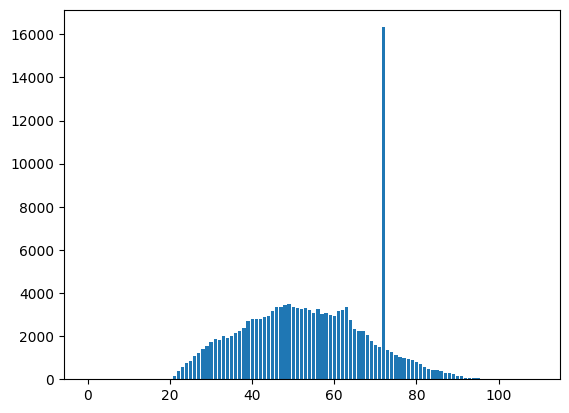

In [161]:
# data['NumberOfDependents'].isnull().value_counts()
# data['NumberOfDependents'].describe()

# График распределения количества иждивенцев на возраст клиентов
uniq_age = pd.unique(data['age']) # получаем уникальные значения возрастов
uniq_age.sort() # cортируем список возрастов
age_numdep = data.groupby("age")["NumberOfDependents"].count()

plt.bar(uniq_age,age_numdep)

# 20 иждевенцев на 72 летнем клиенте????
# data.loc[data['NumberOfDependents'] == 20]

# 13 иждевенцев на 52 летнем клиенте????
# data.loc[data['NumberOfDependents'] == 13]

# Сколько клиентов имеют разное количество иждивенцев(иждевенцы по оси x)
# plt.hist(data['NumberOfDependents'], bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30])


In [149]:
# В связи с чем самое частовстречающееся значение по иждивенцам это 0, то таким значением будем заполнять пустые записи.
med_numofdep = data['NumberOfDependents'].median()

print(med_numofdep)

0.0


In [150]:
# Заполнение пустых записей по иждивенцам
data['NumberOfDependents'].fillna(med_numofdep, inplace = True)

In [151]:
# Корректировка данных по MonthlyIncome
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

<BarContainer object of 5 artists>

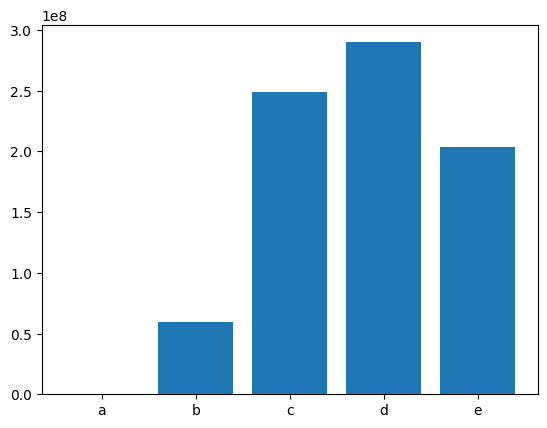

In [152]:
# Корректировка данных по MonthlyIncome

# # Проверка нет ли какой-то зависимости
# data.groupby("GroupAge")["MonthlyIncome"].mean()
uniq_groupage = pd.unique(data['GroupAge']) # получаем уникальные значение возрастных групп
uniq_groupage.sort() # cортируем списка групп
groupage_income = data.groupby("GroupAge")["MonthlyIncome"].sum()

plt.bar(uniq_groupage,groupage_income)


##### Черновик ######
# print("average income -", data['MonthlyIncome'].mean())
# print("median income-", data['MonthlyIncome'].median())

In [153]:
# У каждой возрастной группы есть отсутсвующая информация по доходу.
# data.loc[data['GroupAge'] == 'a']['MonthlyIncome'].isnull().value_counts() # null = 1
# data.loc[data['GroupAge'] == 'b']['MonthlyIncome'].isnull().value_counts() # null = 14811
# data.loc[data['GroupAge'] == 'c']['MonthlyIncome'].isnull().value_counts() # null = 36081
# data.loc[data['GroupAge'] == 'd']['MonthlyIncome'].isnull().value_counts() # null = 37447
data.loc[data['GroupAge'] == 'e']['MonthlyIncome'].isnull().value_counts() # null = 31929

False    31929
True     11001
Name: MonthlyIncome, dtype: int64

In [154]:
# Медианное значение дохода для каждой возрастной группы
data.groupby("GroupAge")["MonthlyIncome"].median()

GroupAge
a    6000.0
b    3400.0
c    5800.0
d    6250.0
e    5009.0
Name: MonthlyIncome, dtype: float64

In [155]:
# Среднее значение дохода для каждой возрастной группы
data.groupby("GroupAge")["MonthlyIncome"].mean()

GroupAge
a    6000.000000
b    4035.569239
c    6906.329869
d    7740.261944
e    6370.608068
Name: MonthlyIncome, dtype: float64

In [156]:
# Медианное значение дохода для всей выборки
data["MonthlyIncome"].mean()

6670.221237392844

In [157]:
# В рамках каждой группы будет найдено значение медианного дохода и этим значеним будут заполнены пустые значения в группах.

# Нахождение медианного дохода для возрастной группы 'b'
med_income_group_b = data.loc[data['GroupAge'] == 'b']['MonthlyIncome'].median()
# Нахождение медианного дохода для возрастной группы 'c'
med_income_group_c = data.loc[data['GroupAge'] == 'c']['MonthlyIncome'].median()
# Нахождение медианного дохода для возрастной группы 'd'
med_income_group_d = data.loc[data['GroupAge'] == 'd']['MonthlyIncome'].median()
# Нахождение медианного дохода для возрастной группы 'e'
med_income_group_e = data.loc[data['GroupAge'] == 'e']['MonthlyIncome'].median()

print(med_income_group_b, med_income_group_c, med_income_group_d, med_income_group_e)

3400.0 5800.0 6250.0 5009.0


In [158]:
# Заполнение пропусков по ежемесячному доходу в рамках определенной возрастной группы.

data.loc[(data["GroupAge"] == "b") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_b
# data.loc[data['GroupAge'] == 'b'].isnull()['MonthlyIncome'].value_counts() # Проверка заполнения
data.loc[(data["GroupAge"] == "c") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_c
data.loc[(data["GroupAge"] == "d") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_d
data.loc[(data["GroupAge"] == "e") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_e

In [159]:
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
RealEstateLoansOrLines                  0
GroupAge                                0
dtype: int64

In [160]:
# Проверка качества заполнения атрибутов
all_table_names = list(data.columns.values) # получение всех(уникальных) наименований столбцов в список
print(all_table_names)

for name in all_table_names:
  print("Column name: " + name)
  print(data[name].value_counts())
  print('-----------------------------------------')
# data['voicemailplan'].value_counts()

['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'RealEstateLoansOrLines', 'GroupAge']
Column name: SeriousDlqin2yrs
0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64
-----------------------------------------
Column name: RevolvingUtilizationOfUnsecuredLines
0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
            ...  
1.024961        1
0.006480        1
0.055599        1
0.887419        1
1.026395        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64
-----------------------------------------
Column name: age
72.0     16325
49.0      3471
48.0      3456
63.0      3374
50.0      3365
         ...  
101.0        2
109.0        2
107.0        1
105.0        1
0.0          1
Name: age, Length: 86,

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
133709                 0                               50708.0  72.0   
2955                   0                               29110.0  58.0   
126617                 0                               22198.0  72.0   
139239                 0                               22000.0  72.0   
149891                 0                               20514.0  42.0   
99516                  0                               18300.0  45.0   
59911                  0                               17441.0  51.0   
107575                 0                               13930.0  45.0   
49325                  0                               13498.0  38.0   
48359                  0                               13400.0  43.0   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
133709                                     0     0.221757        38000.0   
2955                                       0     0.4025

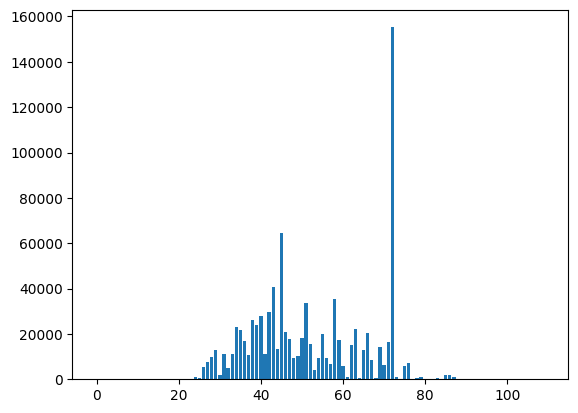

In [69]:
# Проверка общего баланса средств: 

# data.groupby("GroupAge")["MonthlyIncome"].mean()
uniq_groupage = pd.unique(data['age']) # получаем уникальные значение возрастных групп
uniq_groupage.sort() # cортируем списка групп
groupage_rev = data.groupby("age")["RevolvingUtilizationOfUnsecuredLines"].sum()

plt.bar(uniq_groupage,groupage_rev)

# первые 10 записей по максимальному значению поля RevolvingUtilizationOfUnsecuredLines
print(data.nlargest(10, 'RevolvingUtilizationOfUnsecuredLines'))

#### Черновик
# Поиск максимального значения в колонке
# maxValueIndex = data.loc[data['RevolvingUtilizationOfUnsecuredLines'].idxmax()]
# print(maxValueIndex)


Выглядит так, что очень большая сумма по атрибуту "общий баланс средств" приходится на возраст 72. Похоже на выброс, однако при рассмотрении top 10 записей отсортированных от макс к мин, то выбросов не наблюдается.

# Исключение выбросов из выборки

In [169]:
data2 = data

In [170]:
data2.describe(include='object') # категориальные признаки

,RealEstateLoansOrLines,GroupAge
count,150000,150000
unique,5,5
top,A,d
freq,140048,47268


In [171]:
corr = data2.corr() # строим матрицу корреляции
corr.style.background_gradient(cmap='coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.101266,0.125587,-0.007602,-0.017765,-0.029669,0.117175,0.102261,0.046869
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.002747,-0.001314,0.003961,0.006433,-0.011281,-0.001061,-0.001048,0.001193
age,-0.101266,-0.002747,1.000000,-0.055028,0.019686,0.023943,0.130794,-0.053048,-0.049644,-0.189544
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.055028,1.000000,-0.006542,-0.010055,-0.055312,0.983603,0.987005,-0.004590
DebtRatio,-0.007602,0.003961,0.019686,-0.006542,1.000000,-0.014892,0.049565,-0.008320,-0.007533,-0.044476
MonthlyIncome,-0.017765,0.006433,0.023943,-0.010055,-0.014892,1.000000,0.088988,-0.012285,-0.011031,0.066896
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.130794,-0.055312,0.049565,0.088988,1.000000,-0.079984,-0.071077,0.074026
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.053048,0.983603,-0.008320,-0.012285,-0.079984,1.000000,0.992796,-0.011962
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.049644,0.987005,-0.007533,-0.011031,-0.071077,0.992796,1.000000,-0.012678
NumberOfDependents,0.046869,0.001193,-0.189544,-0.004590,-0.044476,0.066896,0.074026,-0.011962,-0.012678,1.000000


In [172]:
data2 = data2.drop(['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse'],axis=1)

In [173]:
for col in data2.columns:
    try:
        print(col, np.corrcoef(data[col], data2['SeriousDlqin2yrs'])[0][1])
    except:
        pass

SeriousDlqin2yrs 1.0
RevolvingUtilizationOfUnsecuredLines -0.0018015025039439722
age -0.10126638639426587
DebtRatio -0.007602119826456188
MonthlyIncome -0.017765387802228298
NumberOfOpenCreditLinesAndLoans -0.02966856846931847
NumberOfTime60-89DaysPastDueNotWorse 0.1022608610503743
NumberOfDependents 0.046869008345669656


Наибольшее влияние на целевую переменную оказывает показатель просрочки и среднее влияние от количества иждивенцев на попечении

# Чистка данных

In [174]:
# Удаление 72-го клиента с 20тью иждивенцами:
data2 = data2[data2.NumberOfDependents != 20]
print(data2[data2.NumberOfDependents == 20])

# Удаляем единственного представителя возрастной группы 'a', по причине возраста 0.
# чисто в теории можно было бы поставить этой группе возраст меньше 21 года, т.к. следующая возрастная группа начинается с 21 года.
data2 = data2[data2.GroupAge != 'a']
print(data2[data2.GroupAge == 'a'])

# Дискуссионный вопрос, но все же. Из выборки были исключены клиента старше 90 лет:
data2 = data2[data2.age < 90]
print(data2[data2.age > 90])

# Из выборки были исключены клиенты, у которых доход меньше 1000:
data2 = data2[data2.MonthlyIncome > 999]
print(data2[data2.MonthlyIncome < 1000])


#################################################################
##[Черновик]
#################################################################
# 20 иждевенцев на 72 летнем клиенте????
# data.loc[data['NumberOfDependents'] == 20]
# Првоеряем у кого и сколько иждевенцев
# uniq_age = pd.unique(data2['age']) # получаем уникальные значение всех возрастов
# uniq_age.sort() # cортируем списка групп
# groupage_dep = data2.groupby("NumberOfDependents")["age"].sum()
# # print(type(groupage_dep))
# # print(groupage_dep.sort_values(ascending=False))
# # data2 = data2.loc[data2['NumberOfDependents'] != 20]
# data2 = data2[data2.NumberOfDependents != 20]
# print(data2[data.NumberOfDependents == 20])


# numofdep_count = data2.groupby("NumberOfDependents")['age'].count()
# print(numofdep_count)

# print(data2[['NumberOfDependents', 'age']].sort_values('NumberOfDependents', ascending=False))

# print(groupage_dep.loc[groupage_dep['age'] == 22, 'NumberOfDependents'].values)

# print(data2.loc[data2['NumberOfDependents'] == 20])

# groupage_dep[0] = max(groupage_dep)
# print(groupage_dep = max(groupage_dep))
# plt.plot(uniq_age,numofdep_count)

Empty DataFrame
Columns: [SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, RealEstateLoansOrLines, GroupAge]
Index: []
Empty DataFrame
Columns: [SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, RealEstateLoansOrLines, GroupAge]
Index: []
Empty DataFrame
Columns: [SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, RealEstateLoansOrLines, GroupAge]
Index: []
Empty DataFrame
Columns: [SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents, RealEstateLoansOrLines, GroupAge]
Index: []


<BarContainer object of 69 artists>

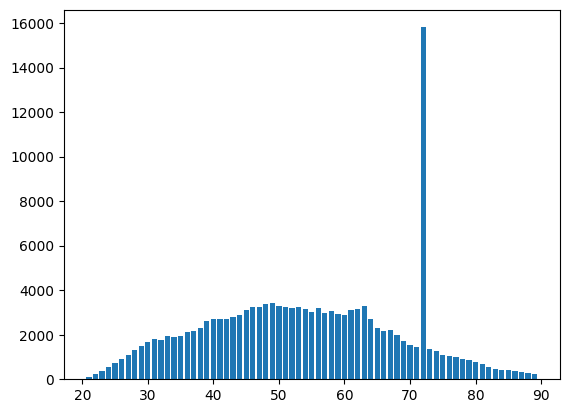

In [180]:
# График распределения количества иждивенцев на возраст клиентов
uniq_age = pd.unique(data2['age']) # получаем уникальные значения возрастов
uniq_age.sort() # cортируем список возрастов
age_numdep = data2.groupby("age")["NumberOfDependents"].count()

plt.bar(uniq_age, age_numdep)


Записи в исходных данны по клиентам с возрастом 72 на порядок больше, чем по всем остальным. Вопрос делать ли с этим что-то? Пока идей нет...

# Визуализация данных

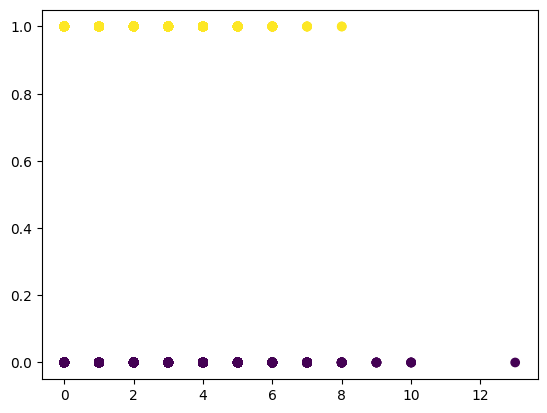

In [186]:

plt.scatter(data2['NumberOfDependents'], data2['SeriousDlqin2yrs'], c=data2['SeriousDlqin2yrs'])

In [187]:
data2.groupby('SeriousDlqin2yrs')['NumberOfDependents'].mean()

SeriousDlqin2yrs
0    0.731171
1    0.936798
Name: NumberOfDependents, dtype: float64

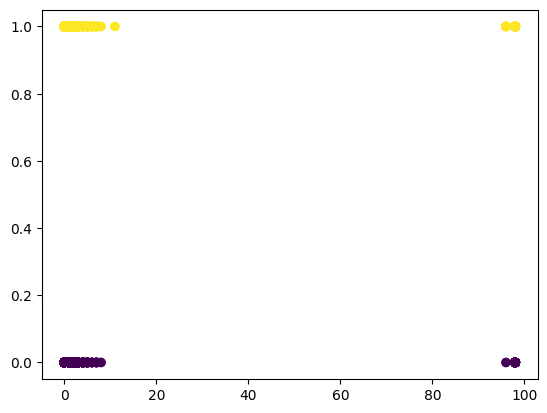

In [188]:
plt.scatter(data2['NumberOfTime60-89DaysPastDueNotWorse'], data2['SeriousDlqin2yrs'], c=data2['SeriousDlqin2yrs'])

In [189]:
data2.groupby('SeriousDlqin2yrs')['NumberOfTime60-89DaysPastDueNotWorse'].mean()

SeriousDlqin2yrs
0    0.119745
1    1.744537
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [190]:
# Сохранение данных в csv файл.
data2.to_csv("Credit_scoring_team5_E.csv", index=False)

Визуальный осмотр данных:

<Axes: >

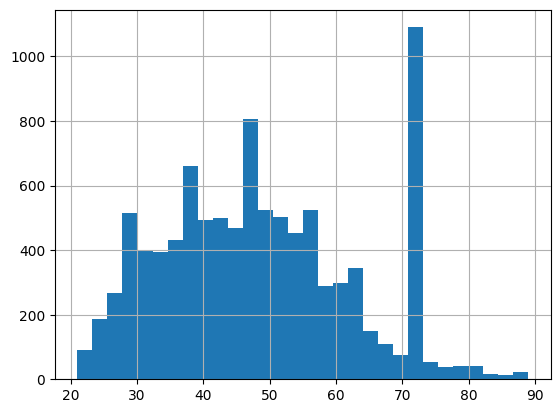

In [191]:
# вывел атрибуты, чтобы под рукой были для просмотра на графике
list_of_attributes = [
'RevolvingUtilizationOfUnsecuredLines',
'age',
'NumberOfTime30-59DaysPastDueNotWorse',
'DebtRatio',
'MonthlyIncome',
'NumberOfOpenCreditLinesAndLoans',
'NumberOfTimes90DaysLate',
'NumberOfTime60-89DaysPastDueNotWorse',
'NumberOfDependents',
'RealEstateLoansOrLines',
'GroupAge'
]

# График распределения признака просрочки 90+ дней по выбранному атрибуту
data2[data2.SeriousDlqin2yrs == 1]['age'].hist(bins=30)

In [192]:
# На графике выше по полю age видим существенный выброс.
# Посмотрим, насколько он, так сказать, кривой
age_ser_prev = data2.loc[data2['age'] >= 65]
age_ser = age_ser_prev.groupby(['age','SeriousDlqin2yrs'])
age_ser.size()

##### Черновик #####
# print(data2.loc[data2['age'] >= 65, 'SeriousDlqin2yrs'])
# age_ser.filter(lambda x: x['age'] > 65)
# data2[data2.SeriousDlqin2yrs == 1][['age', 'SeriousDlqin2yrs']].value_counts
# data2.groupby(data2.SeriousDlqin2yrs == 1)['age'].value_counts

age   SeriousDlqin2yrs
65.0  0                    2212
      1                      80
66.0  0                    2115
      1                      70
67.0  0                    2140
      1                      69
68.0  0                    1958
      1                      39
69.0  0                    1692
      1                      30
70.0  0                    1484
      1                      45
71.0  0                    1418
      1                      38
72.0  0                   14793
      1                    1014
73.0  0                    1306
      1                      38
74.0  0                    1215
      1                      36
75.0  0                    1064
      1                      19
76.0  0                    1007
      1                      21
77.0  0                     963
      1                      16
78.0  0                     881
      1                      21
79.0  0                     845
      1                      19
80.0  0          

По клиентам, возраст которых составляет 72 года, количество значений '1' и '0' по атрибуту SeriousDlqin2yrs раз в 10 больше количества исследуемых клиентов в других возрастах. С одной стороны это похоже на выбросы, с другой стороны пропорцильнасть значений поля SeriousDlqin2yrs внутри возраста примерно соблюдена. (я надеюсь :) )

# Обучение модели

In [193]:
# Формирование матрицы X объект-признак и вектор y целевой переменной.
x = data2.drop('SeriousDlqin2yrs', axis=1) # матрица объект-признак
y = data2['SeriousDlqin2yrs'] # целевая переменная

В связи с тем, что в постановке задачи указано спрогнозироваться целевую переменную в виде "имел клиент просрочку 90 и более дней или нет", то мы будем использовать логистическую регрессию.

In [194]:
# Исключаем из выборки качественные атрибуты:
x = x.drop(['RealEstateLoansOrLines','GroupAge'], axis=1)

In [195]:
# Разобъём данные на train и test (test — 25% от всех данных)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

# random_state - задаётся конкретное число по причине того, чтобы при каждом запуске модель выдавала бы один и тот же результат(см.подробнее - https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn/28069274#28069274)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [196]:
# Проверяем в одинаковых ли масштабах измеряются признаки клиентов?
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.221813,43.0,0.527888,3280.0,7,0,2.0
2,0.025656,38.0,0.475841,3000.0,7,0,2.0
3,0.075427,32.0,0.085512,7916.0,6,0,0.0
4,0.046560,58.0,0.241622,2416.0,9,0,0.0
5,0.392248,50.0,1.595253,4676.0,14,0,1.0


In [197]:
# Визально видно, что масштаб разный. По этой причине требуется отмасштабировать признаки.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)
  
Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=x.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=x.columns)

Xtrain.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.022182,-2.170784,-0.214105,-0.208427,-1.464005,-0.057821,-0.675323
1,-0.022917,-0.421593,-0.213570,-0.043529,-0.106952,-0.057821,1.127478
2,-0.025922,0.183896,-0.214002,-0.303517,-0.494681,-0.057821,-0.675323
3,-0.026398,0.520279,-0.213543,-0.055003,0.668507,-0.057821,-0.675323
4,-0.026559,1.327598,-0.191220,-0.111618,1.637830,-0.057821,-0.675323


In [198]:
# Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # объявление модели
model.fit(Xtrain, ytrain) # обучение модели

LogisticRegression()

In [199]:
# Предсказание классов
pred_test = model.predict(Xtest)

In [200]:
# Результат предсказания:
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
# accuracy - Оценка точности классификации. В классификации с несколькими метками эта функция вычисляет точность подмножества: набор меток, предсказанный для выборки, должен точно соответствовать соответствующему набору меток в y_true.)
# Проверяем точность предсказания 
print("Accuracy:", accuracy_score(ytest, pred_test)) 

# Precision — это интуитивно способность классификатора не маркировать отрицательный образец как положительный.
# Цель precision – классифицировать все Positive семплы как Positive, не допуская ложных определений Negative как Positive
# Лучшее значение равно 1, а худшее значение равно 0.
print("Precision:", precision_score(ytest, pred_test)) 

# Recall (полнота) - Отзыв представляет собой отношение tp / (tp + fn), где tp — количество истинных положительных результатов, а fn — количество ложноотрицательных результатов.
# Интуитивная способность классификатора находить все положительные образцы.
# Лучшее значение равно 1, а худшее значение равно 0.
print("Recall:", recall_score(ytest, pred_test))


Accuracy: 0.9342235956296214
Precision: 0.5416666666666666
Recall: 0.010887772194304857


In [202]:
# Кроме этого следует проверить сбалансированность исходной выборки данных:
y.value_counts()

0    135179
1      9794
Name: SeriousDlqin2yrs, dtype: int64

In [203]:
# Доля клиентов, которые по историческим данным выходили на просрочку более 90 дней.
print(9794/135179)

0.07245208205416521


Исходят из низкого процента клиентов выходивших на просрочку более 90 дней, мы можем сделать заключение, что модель не очень подходит для прогнозов и требуется провести валидацию. Из-за несбалансированности исходных модель даёт более оптимистичные результаты по Клиентам. Другими словами, в выборке очень много Клиентов, которые не выходили на просрочку, следовательно модель считает это правилом для любой выборки данных, которые в будущем будут подаваться на вход.

Precision равен чуть больше 50%, что модель ошибается на каждом втором клиенте при определении о возможности выйти на просрочку 90+ дней.

Также recall близок к 0, что говорит о способности модели в любом клиенте видеть положительный образ, а не относиться к нему нейтрально.

In [204]:
# Импортируем класс с матрицей ошибок.
from sklearn.metrics import confusion_matrix

# Матрица ошибок
cnf_matrix = confusion_matrix(ytest, pred_test)
print(cnf_matrix)

[[33834    22]
 [ 2362    26]]


In [205]:
26/(2362+26)

0.010887772194304857

Модель определила правильно 1 % клиентов, которые выйдут на просрочку. Качество не подходит нам.

In [207]:
# Посмотрим визуально какую вероятность выдаёт модель для первых 20 записей
probs = model.predict_proba(Xtest)

probs[:20]

array([[0.92932259, 0.07067741],
       [0.93044492, 0.06955508],
       [0.96208501, 0.03791499],
       [0.96182338, 0.03817662],
       [0.92384707, 0.07615293],
       [0.91544903, 0.08455097],
       [0.92617054, 0.07382946],
       [0.93406445, 0.06593555],
       [0.91302332, 0.08697668],
       [0.92067721, 0.07932279],
       [0.96821934, 0.03178066],
       [0.95765255, 0.04234745],
       [0.95625193, 0.04374807],
       [0.95740354, 0.04259646],
       [0.90144429, 0.09855571],
       [0.94612831, 0.05387169],
       [0.94645969, 0.05354031],
       [0.9209441 , 0.0790559 ],
       [0.92355871, 0.07644129],
       [0.93549454, 0.06450546]])

In [ ]:
# Модель присваивает классу 0 (клиент не выйдет на просрочку 90+) всегда большие вероятности.
# Попробуем изменить порог для перевода вероятности в классы со стандартного 0.5 на порог поменьше.

In [208]:
# методом подбора пришел к выводу, что порог 0.08 даёт более менее нормальный результат по количеству отловленных клиентов с просрочкой в будущем 90+
probs_SerDlqin2yrs = probs[:,1]

classes = probs_SerDlqin2yrs > 0.08

In [209]:
# Матрица ошибок для Лог.регрессии
confusion_matrix(ytest, classes)

array([[24280,  9576],
       [ 1267,  1121]])

In [210]:
ytest.value_counts()

0    33856
1     2388
Name: SeriousDlqin2yrs, dtype: int64

In [212]:
9576 /(24280 + 9576)

0.28284499054820417

In [213]:
# Перепроверим после изменения порога вероятности
print("Accuracy:", accuracy_score(ytest, classes)) 

print("Precision:", precision_score(ytest, classes)) 

print("Recall:", recall_score(ytest, classes))

# roc_au - равен доле пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил
# Чем выше площадь под кривой, тем лучше производительность модели.
print("roc_au:", roc_auc_score(ytest, probs[:, 1]))

Accuracy: 0.7008332413640879
Precision: 0.10479573712255773
Recall: 0.4694304857621441
roc_au: 0.649686514695801


С понижением вероятности возникает все больше ошибок в определении клиентов, которые не получат просрочку 90+ дней, но модель им ее проставляет. Для recall = 60% доля таких Клиентов составляет 28%. Другими словами, каждый 5ый клиент будет определен неверным признаком просрочки.

Попробовав разные вероятности для выборки пришли к выводу, что данная модель построена не очень качественно и следует попробовать другой метод.

# Метод ближайших соседей

Попробуем применить другой способ классификации.

In [214]:
# Импортируем соответствующий класс
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [215]:
# Обучение модели
knn.fit(Xtrain, ytrain)

pred_test_knn = knn.predict_proba(Xtest)[:,1]
probs_knn = model.predict_proba(Xtest)

# print(pred_test_knn.astype(int)[:20])

# Вывод матрицы рисков
confusion_matrix(ytest, pred_test_knn.astype(int))

array([[33853,     3],
       [ 2373,    15]])

In [216]:
classes_knn = pred_test_knn > 0.08

# метод ближнего соседа
confusion_matrix(ytest, classes_knn)

array([[25866,  7990],
       [ 1299,  1089]])

In [217]:
# Логарифмическая регрессия
confusion_matrix(ytest, classes)

array([[24280,  9576],
       [ 1267,  1121]])

При одинаковой вероятности, на первый вгляд кажется, что модель ближайщего соседа лучше, чем лог.регрессия. давайте же вглянем на метрики моделей:

In [218]:
# Логичестическая регрессия
print("Логичестическая регрессия")
print("Accuracy:", accuracy_score(ytest, classes)) 
print("precision: ", precision_score(ytest, classes))
print("recall: ", recall_score(ytest, classes))
print("roc-auc: ", roc_auc_score(ytest, probs[:, 1]))

# Ближайщий сосед
print("\nМетод Ближайщего соседа")
print("Accuracy:", accuracy_score(ytest, classes_knn)) 
print("Precision:", precision_score(ytest, classes_knn))
print("Recall:", recall_score(ytest, classes_knn))
print("roc-auc:", roc_auc_score(ytest, pred_test_knn.astype(int)))

Логичестическая регрессия
Accuracy: 0.7008332413640879
precision:  0.10479573712255773
recall:  0.4694304857621441
roc-auc:  0.649686514695801

Метод Ближайщего соседа
Accuracy: 0.7437093036088732
Precision: 0.11994713074127107
Recall: 0.45603015075376885
roc-auc: 0.5030963982245823


Несмотря на то, что точность второго подхода выше, при это roc-auс у него ниже. Смею предположить, что первая модель лучше определяет признак просрочки, чем вторая. Причина в количестве допущенных ошибок, которую отразил roc-auc.

# Градиентный бустинг

In [219]:
# CatBoost — библиотекой от Яндекса, которая очень эффективно написана и широко используется в мире.
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [220]:
# Из библотеки испортируем требуемые классы
from catboost import CatBoostClassifier, Pool

In [221]:
# Разбитие исходных данных на пулы
train_bust_set = Pool(Xtrain, ytrain)
test_bust_set = Pool(Xtest, ytest)

In [223]:
# Обучение модели
gbm = CatBoostClassifier(iterations=100, # сколько стоится деревьев
                          depth=2, # глубина дерева
                          learning_rate=0.1, 
                          loss_function='Logloss', # какую ошибку мы минимизируем
                          eval_metric='AUC', # отложенная выборка
                          verbose=False)
gbm.fit(train_bust_set, eval_set=test_bust_set)
gbm_preds = gbm.predict_proba(Xtest)

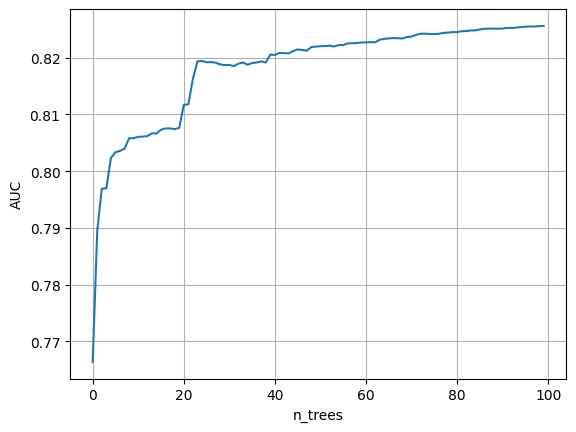

In [224]:
# Отражение результатов на графике
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('n_trees')
plt.ylabel('AUC')
plt.grid()

In [225]:
gbm_classes = (gbm_preds[:, 1] > 0.08)
print("precision: ", precision_score(ytest, gbm_classes))
print("recall: ", recall_score(ytest, gbm_classes))
print("auc-roc: ", roc_auc_score(ytest, gbm_preds[:, 1]))

## Глубина дерева N = 2
# precision:  0.2449244060475162
# recall:  0.7123115577889447
# auc-roc:  0.8637442044421857

## Глубина дерева N = 3
# precision:  0.2429919707000986
# recall:  0.7223618090452262
# auc-roc:  0.865038173796677

## Глубина дерева N = 5
# precision:  0.24168975069252077
# recall:  0.7307370184254607
# auc-roc:  0.8672257569154849

precision:  0.18623655913978496
recall:  0.7252931323283082
auc-roc:  0.8255957082890033


In [227]:
# Построение таблицы с весами каждого из атриубутов
coef_table = pd.DataFrame({'features' : list(x.columns), 'importances' : list(gbm.get_feature_importance())})

coef_table.sort_values(by = 'importances')

,features,importances
6,NumberOfDependents,0.796795
2,DebtRatio,2.959513
3,MonthlyIncome,3.106508
4,NumberOfOpenCreditLinesAndLoans,5.114404
1,age,6.481829
5,NumberOfTime60-89DaysPastDueNotWorse,18.871046
0,RevolvingUtilizationOfUnsecuredLines,62.669904


Несмотря на то, что в матрице корреляций атрибут RevolvingUtilizationOfUnsecuredLines имел одно из самых слабых влияний на результирующую переменную SeriousDlqin2yrs, то после построения дерева решений его влияние стало самым сильным (в несколько раз).

# Shapley values

In [228]:
# Установка shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.5 MB/s eta 0:00:00


In [229]:
# Испортирование соответствующих библиотек и классов
import catboost
from catboost import *
import shap
shap.initjs()

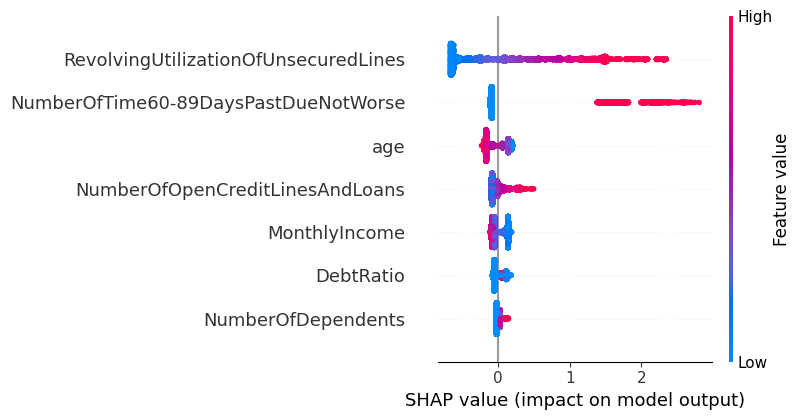

In [231]:
# Визуализация вектора Шепли 
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(Xtest)

shap.summary_plot(shap_values, Xtest)

In [232]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[1,:], Xtest.iloc[1,:])

# Для итоговой результата будем использовать модель построенную методом градиентного бустинга!
Roc-auc вырос существенно, что говорит о меньшем количестве ошибок.
Recall также вырос, что говорит все Positive семплы классифицируются верно. Следовательно, модели можно доверять в ее способности обнаруживать представителей класса Positive, а значит клиентов, которые выйдут на просрочку 90+ дней. Для бизнеса важнее раньше видеть таких Клиентов и создавать под них доп.резерв или принимать другие меры.

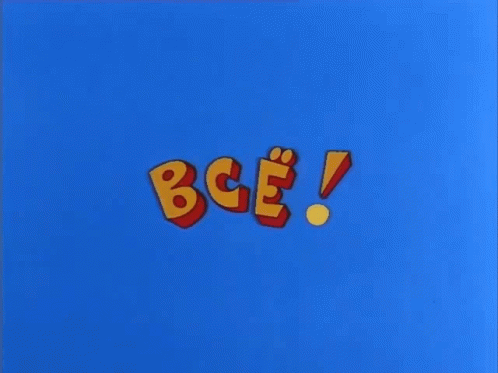